<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
<div style="padding-top:35px;"></div>
# Descriptive Statistics Review

According to Ding Zhou, Chief Scientist at Klout, a klout score is a number that measures one's influence across the internet, primarily the social media.

In [57]:
%matplotlib inline

In [58]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import math

sns.set(rc={"figure.figsize": (8.5, 5.5)})
sns.set_style('white')
current_palette = matplotlib.colors.hex2color('#90A4AE')

I have a dataset of klout scores in a CSV file. The file has no header, so I specify my own column name called `Score` upon importing.

In [59]:
filepath = '.\\datasets\\klout_scores_01.csv'
klout_df = pd.read_csv(filepath, names=['Score'])

Show the first five records of the klout score dataset.

In [60]:
klout_df[0:4]

,Score
0,25.104179
1,60.908747
2,23.222238
3,51.553491


Print out the structure of the klout dataset.

In [61]:
klout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 1 columns):
Score    1048 non-null float64
dtypes: float64(1)
memory usage: 8.3 KB


The dataset has 1048 records and 1 column called `Score`. There are no empty or null values in the `Score` column.  The single column holds values that consist of double-precision floating point data types.

### Population Parameters

Let's show the mean and standard deviation of the klout scores. We will use the standard deviation for the population instead of sample standard deviation in measuring the dispersion of klout scores.

If you'd like to find the sample standard deviation, you would have to use [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) and pass `ddof=1` in your `numpy.std()` function:

`klout_sample_std  = np.std(klout_df['Score'], ddof=1)`

In [62]:
klout_scores = klout_df['Score']
klout_mean = round(np.mean(klout_scores), 2)
klout_std  = round(np.std(klout_scores), 2)
print("Population Mean: {0} \nPopulation Standard Deviation: {1}".format(klout_mean, klout_std))

Population Mean: 37.72 
Population Standard Deviation: 16.04


Another way of getting at a description of the parameters of the klout dataset is by using the `describe()` function.

<strong>BEWARE</strong>: The standard deviation parameter of the `describe()` function is for finding the standard deviation of a sample because it uses an unbiased estimator (`n - 1`) by default. 

In [63]:
klout_df.describe()

,Score
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


The distribution of klout data is shown below. 

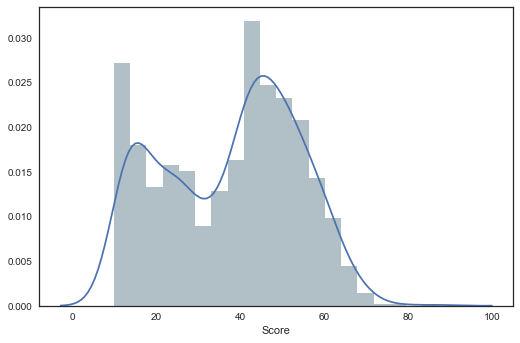

In [64]:
sns.distplot(klout_scores, bins=20, hist_kws={"alpha": 0.7, "color": current_palette});

The histogram shows that the distribution of klout scores is bimodal with a population mean of approximately 37.72.

## Sampling Distribution

Let's check the skew of the klout population scores.

In [65]:
klout_skew = stats.skew(klout_scores)
print("Klout population score skew: {0}".format(klout_skew))

Klout population score skew: -0.134510400248


The distribution of klout scores does not appear to have a normal skew. This characteristic may be exhibited in any sample that we draw from the population. I'll take a sample from the klout score population to verify this.

Below, we take a sample of size 35 from the klout score population and plot a histogram.

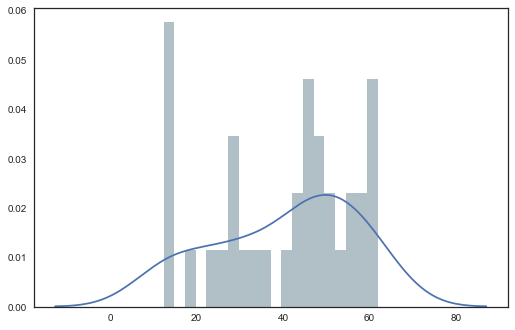

In [66]:
np.random.seed(2)
klout_scores_sample = np.random.choice(a=klout_scores, size=35)

plt.figure(figsize=(8.5, 5.5))
sns.distplot(klout_scores_sample, bins=20, hist_kws={"alpha": 0.7, "color": current_palette});

As we can see, the sample of klout scores roughly exhibits a similar bimodal shape as the population from which it was derived. Can we apply the statistical tools that assume a normal distribution to the klout dataset?

The central limit theorem would still allow us to use statistical tools over the klout dataset even if the underlying distribution is itself not normally distributed. 

The central limit theorem proposes that the distribution of sample means (sampling distribution) will be normally distributed and we can use the sample mean as if it were drawn from a normal distribution.

To illustrate this, let's take 1,000 samples from the population of klout scores with each sample having a sample size of 35 (`n=35`). We then get the mean (point estimate) from each sample and collect the means to form a sampling distribution of sample means.

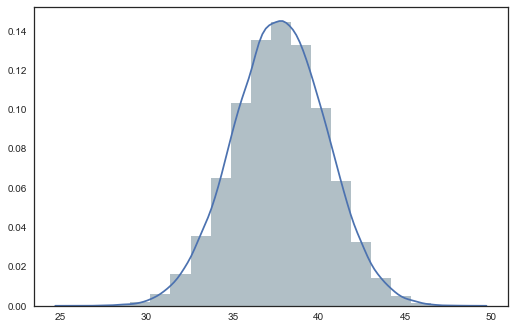

In [67]:
np.random.seed(2)
sample_means = []
n = 35

for x in range(100000):
    sample = np.random.choice(a=klout_scores, size=n)
    sample_means.append(sample.mean())
    
plt.figure(figsize=(8.5, 5.5))
sns.distplot(sample_means, bins=20, hist_kws={"alpha": 0.7, "color": current_palette});

The sampling distribution of sample means tend to be nearly normal. This is despite the bimodal shape of the underlying klout score population distribution from which the samples were drawn.  

Moreover, the mean of the sample means or the mean of the sampling distribution seems to approach the true population mean. 

However, it is interesting to note that the standard deviation of the sample means is much lower than the population standard deviation as we can expect the means of the sample means to be closer to each other and not dispersed.

In [68]:
n = 35
sampling_dist_mean = round(np.mean(sample_means), 2)
print("Mean of the Sampling Distribution: {0}".format(sampling_dist_mean))

Mean of the Sampling Distribution: 37.72


### Standard Error 

The standard deviation of the distribution of sample means (sampling distribution) is the population standard deviation divided by the square root of the sample size (n). This is also called the **standard error**.



$$SE = \frac{\sigma} {\sqrt{n}}$$

> The population standard deviation is usually not available. Thus, we often resort to the point estimate of the standard deviation from a sample to use for our $\sigma$ parameter.

In [69]:
sampling_dist_std = round((klout_std / math.sqrt(n)), 2)
print("Standard Deviation of the Sampling Distribution: {0}".format(sampling_dist_std))

Standard Deviation of the Sampling Distribution: 2.71


In [70]:
# %matplotlib inline
# from plotnine import *
# from plotnine.data import *

# ggplot(klout_df, aes(x='Score')) + geom_histogram()   

### Location of Mean on Sampling Distribution


Why is knowing the shape of the sampling distribution important?

A high klout score has something to do with how influential a person is according to hundreds of factors or signals collected from the internet and social media sites.

The klout score dataset consists of 1,048 klout scores with a population mean of 37.72 and a population standard deviation of 16.04.

One hundred thousand samples with a sample size of 35 klout scores each is taken from the population and the mean of each set of samples is collected to form a sampling distribution of sample means. The sampling distribution has a mean of 37.72 and a standard deviation of 2.71.

#### Test on an app that increases one's Klout score 

It has been touted that an app can enhance one's klout score. We would like to find out if people who actually use the app had their klout scores increased. We took a sample of 35 persons who use the app and obtained a klout score mean of 40 from this sample.

- Where does the sample mean of 40 fall in the distribution of sample means of other samples with the same sample size (35)?  

    - i.e. How many standard deviations above the mean of the sampling distribution (37.72) does our sample mean of 40 lie?

    - i.e. What's the z-score for a mean of 40 given a sampling distribution mean of 37.72 and a standard deviation of 2.71?




$$ z-score = \frac{x - u} {SE} $$

where $u$ is the mean of the sampling distribution, $x$ is the mean of our current sample.

$$ z-score_{\ \bar{x} \ = \  40} = \frac{40 - 37.72} {2.71} = 0.8413 $$

In [71]:
sample_mean = 40
z_score_35 = round((sample_mean - sampling_dist_mean)/(sampling_dist_std),2)
print("Z-score for sample mean of forty: {0}".format(z_score_35))

Z-score for sample mean of forty: 0.84


From the graph of our cumulative distribution function above, we see that a klout sample mean of 40 (x-axis) looks like it's above the mean of the distribution of sample means or sampling distribution (37.72). 

How many standard deviations this mean of 40 is above 37.72? The answer is: the sample klout score mean of 40 is a little less than one standard deviation above the sampling distribution mean. To be more precise, it is 0.84 or 21/25th standard deviation above the sampling distribution mean.

What's the probability of randomly drawing a sample of size 35 with a mean of at least 40?  

We would normally use the Z-table to determine this probability. But we can use a different tool.

### Find the probability of getting more than a specified sample mean

In [72]:
prob_lt_40 = round(stats.norm.cdf(z_score_35), 2)
prob_gt_40 = round((1 - prob_lt_40), 2)
prob_gt_40

0.2

### Does low probability = causation?

The probability of getting less than a mean of 40 is 0.7995. So the probability of getting greater than a mean of 40 is `1 - 0.7995` or **only about  `0.2` ** (`0.2005` to be precise).

> There is a 20% probability of obtaining a sample of 35 people whose klout score mean is greater than 40.

It is somewhat unlikely to have randomly drawn a sample from the whole klout population with a mean of 40. 

If this mean was not selected by chance (i.e, the results of the sample reflects what is truly happening in the total population), then it's possible that the app could have played a role in increasing these people's klout scores.

### How unlikely is a probability of 0.2005?

Can we say that the app *caused* these higher klout scores? No we can't.

All we know that the app users tend to have higher klout scores on average. 

- Maybe the app caused this but maybe it's just that users with already higher klout tended to be the ones who use the app.







### Increasing the sample size

Let's suppose the sample size is now 250 and they also have a mean klout score of 40. Now what's the likelihood of randomly selecting from the klout population a sample of size 250 whose mean is at least 40?

Let's find the standard error.

In [73]:
n = 250
sampling_dist_std = round((klout_std / math.sqrt(n)), 2)

# Standard Error
print("Standard Error of the Sampling Distribution: {0}".format(sampling_dist_std))

Standard Error of the Sampling Distribution: 1.01


The standard error (standard deviation of the sample means) for a sample size of 250 turns out to be even lower at 1.01 compared to 2.71 standard error for a sample size of 35.

Let's now compute the z-score or the number of standard deviations our sample mean of 40 is away from the population mean.

In [79]:
sample_mean = 40
z_score_250 = round((sample_mean - sampling_dist_mean)/(sampling_dist_std),2)
print("Z-score for a Sample Mean of 40: {0}".format(z_score_250))

Z-score for a Sample Mean of 40: 2.26


The probability of getting a sample with a size of 250 klout scores whose sample mean is 40 is implemented below.

In [80]:
prob_lt_40 = round(stats.norm.cdf(z_score_250), 2)
prob_gt_40 = round((1 - prob_lt_40), 2)
prob_gt_40

0.01

This yields a very low probability. The new samping distribution has a very skinny shape because of the low standard deviation.

The probability of getting a sample with mean greater than 40 is very small (0.01). 

> Getting a sample of size 250 with a mean of 40 is pretty unlikely to occur by chance. 

In this case, this shows some kind of probable relationship between the app and klout score.

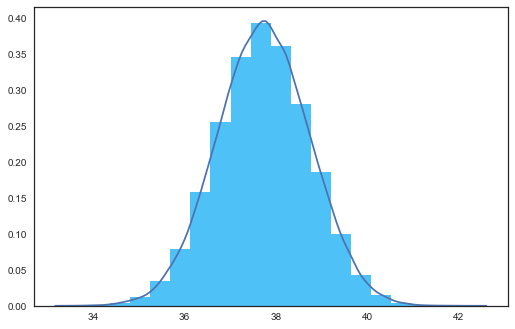

In [67]:
np.random.seed(2)
sample_means = []
n = 250

for x in range(100000):
    sample = np.random.choice(a=klout_scores, size=n)
    sample_means.append(sample.mean())
    
plt.figure(figsize=(8.5, 5.5))
sns.distplot(sample_means, bins=20, hist_kws={"alpha": 0.7, "color": current_palette});